## Initial Exploration

In [1]:
import os, sys
sys.path.append(os.path.abspath("../"))
from src.data.make_dataset import get_dataset

import pandas as pd

DATASET_PATH = '../data/raw/filtered_paranmt/filtered.tsv'

# Load data
get_dataset()
df = pd.read_csv(DATASET_PATH, delimiter='\t')

In [3]:
df.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [4]:
df.isnull().sum()

Unnamed: 0     0
reference      0
translation    0
similarity     0
lenght_diff    0
ref_tox        0
trn_tox        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577777 entries, 0 to 577776
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   577777 non-null  int64  
 1   reference    577777 non-null  object 
 2   translation  577777 non-null  object 
 3   similarity   577777 non-null  float64
 4   lenght_diff  577777 non-null  float64
 5   ref_tox      577777 non-null  float64
 6   trn_tox      577777 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 30.9+ MB


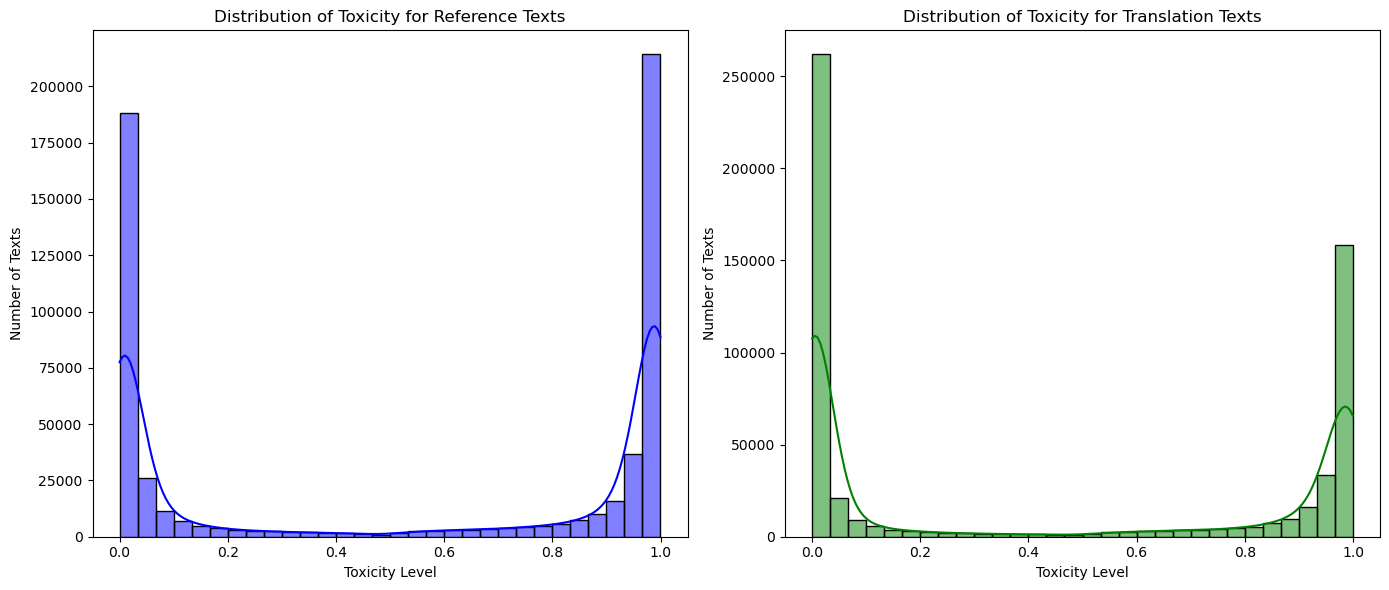

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # Load the data
# data_path = "text-detoxification/data/raw/filtered_paranmt/your_dataset_name.tsv"  # Replace with your dataset's name
# df = pd.read_csv(data_path, sep='\t')

# Plot distribution of toxicity for reference and translation texts
plt.figure(figsize=(14, 6))

# For reference
plt.subplot(1, 2, 1)
sns.histplot(df['ref_tox'], kde=True, bins=30, color='blue')
plt.title('Distribution of Toxicity for Reference Texts')
plt.xlabel('Toxicity Level')
plt.ylabel('Number of Texts')

# For translation
plt.subplot(1, 2, 2)
sns.histplot(df['trn_tox'], kde=True, bins=30, color='green')
plt.title('Distribution of Toxicity for Translation Texts')
plt.xlabel('Toxicity Level')
plt.ylabel('Number of Texts')

plt.tight_layout()
plt.show()


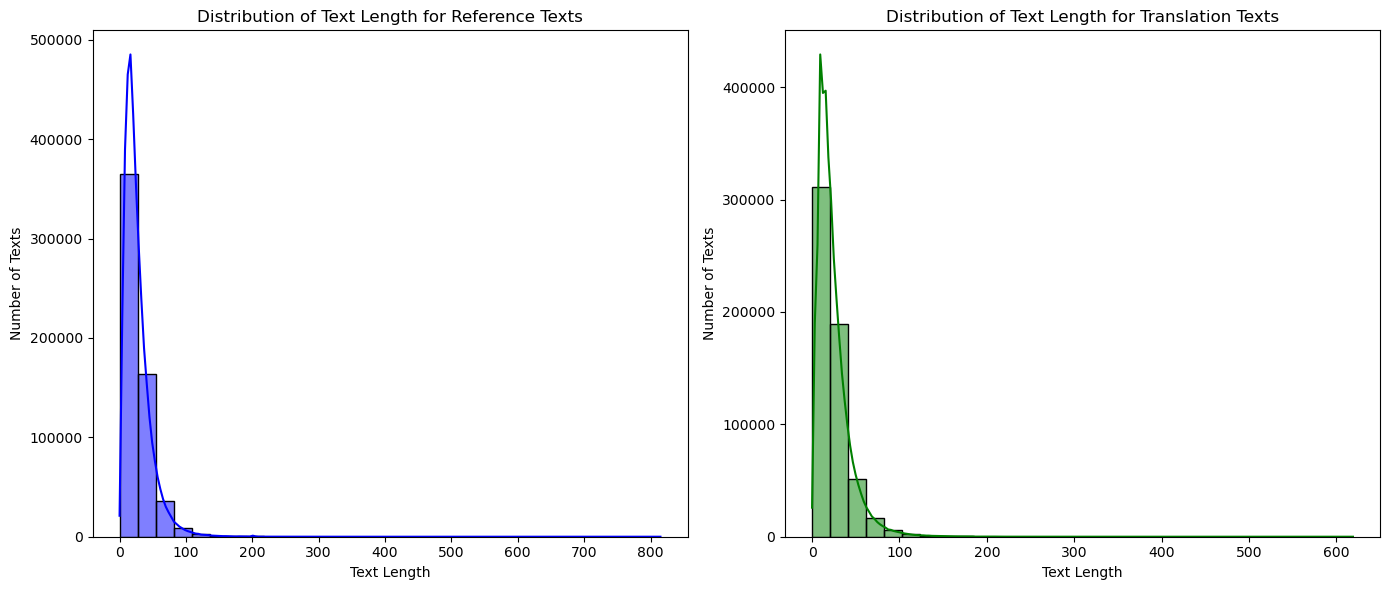

In [10]:
# Calculate text lengths
df['reference_length'] = df['reference'].apply(len)
df['translation_length'] = df['translation'].apply(len)

# Plotting distribution of text lengths for reference and translation texts
plt.figure(figsize=(14, 6))

# For reference text length
plt.subplot(1, 2, 1)
sns.histplot(df['reference_length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Text Length for Reference Texts')
plt.xlabel('Text Length')
plt.ylabel('Number of Texts')

# For translation text length
plt.subplot(1, 2, 2)
sns.histplot(df['translation_length'], kde=True, bins=30, color='green')
plt.title('Distribution of Text Length for Translation Texts')
plt.xlabel('Text Length')
plt.ylabel('Number of Texts')

plt.tight_layout()
plt.show()


Decreasing the range to [0-125] for a better plot.

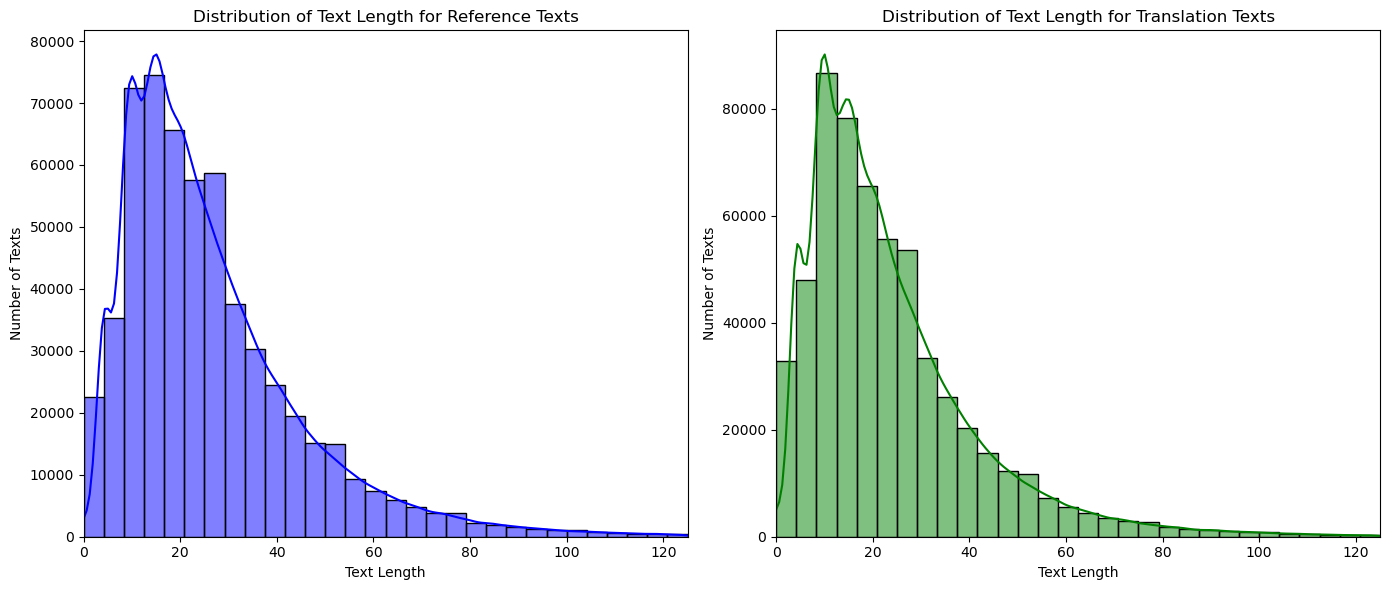

In [28]:
# Plotting distribution of text lengths for reference and translation texts within [0, 125]
plt.figure(figsize=(14, 6))

# For reference text length
plt.subplot(1, 2, 1)
sns.histplot(df[df['reference_length'] <= 125]['reference_length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Text Length for Reference Texts')
plt.xlabel('Text Length')
plt.ylabel('Number of Texts')
plt.xlim(0, 125)  # set x-axis limits

# For translation text length
plt.subplot(1, 2, 2)
sns.histplot(df[df['translation_length'] <= 125]['translation_length'], kde=True, bins=30, color='green')
plt.title('Distribution of Text Length for Translation Texts')
plt.xlabel('Text Length')
plt.ylabel('Number of Texts')
plt.xlim(0, 125)  # set x-axis limits

plt.tight_layout()
plt.show()

### Insights:

#### Distribution of Text Length for Reference Texts:

The majority of reference texts have a length of around 20-50 characters.
There is a sharp peak at approximately 40 characters, which may suggest that a typical reference text in this dataset is about 40 characters long.
As the text length increases beyond 50 characters, the frequency decreases considerably. However, there is still a significant amount of reference texts with lengths up to 100 characters.
Beyond 100 characters, the frequency becomes negligible, suggesting very few reference texts are this long.


#### Distribution of Text Length for Translation Texts:

The distribution for translation texts is somewhat similar to reference texts, but with some differences.
Most translation texts also lie in the 20-50 characters range, with a peak at around 40 characters.
Unlike the reference texts, the decline in the frequency of translation texts beyond 50 characters is not as sharp. This indicates that the translation texts tend to be a bit more varied in length compared to reference texts.
Like reference texts, the number of translation texts beyond 100 characters is very low.

#### General Observation:

Both histograms exhibit a right-skewed distribution. This suggests that while most texts (both reference and translation) are shorter in length, there are a few that are considerably longer.
The overall shape of the distributions and the observed peaks hint at some kind of common structure or pattern in the dataset. This could be a result of the nature of the texts being used, the method of collection, or even inherent properties of the language being translated.
It would be interesting to further investigate what causes the sharp peak around 40 characters and to analyze the content of those specific texts.

### Cosine Similarity Distribution:

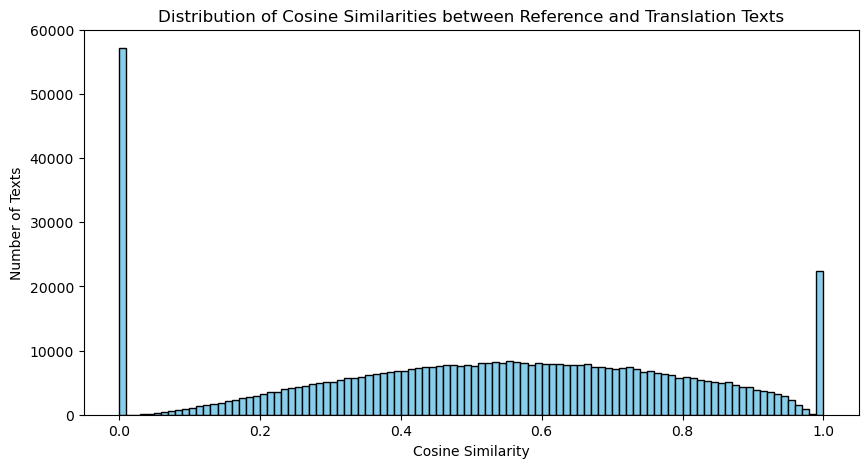

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have two lists: reference_texts and translation_texts
reference_texts = df['reference']
translation_texts = df['translation']

# Use TF-IDF Vectorizer to convert texts into vector format
vectorizer = TfidfVectorizer().fit(reference_texts + translation_texts)
reference_vecs = vectorizer.transform(reference_texts)
translation_vecs = vectorizer.transform(translation_texts)

# Compute the cosine similarity between each pair
similarities = [cosine_similarity(reference_vecs[i], translation_vecs[i])[0][0] for i in range(len(reference_texts))]

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.hist(similarities, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Cosine Similarities between Reference and Translation Texts')
plt.xlabel('Cosine Similarity')
plt.ylabel('Number of Texts')
plt.show()


### Insights:

**High Similarity at 0:** There is a pronounced peak at a cosine similarity of 0. This indicates that a significant number of text pairs have no overlap in terms of their content, meaning the translations, in these cases, do not resemble the reference texts at all.

**Uniform Distribution between 0.2 to 0.8:** The distribution of cosine similarities between 0.2 to 0.8 is roughly uniform, with a slight decrease as the similarity approaches 0.8. This suggests a balanced spread of translation quality within this range. The translations in this band have varying degrees of resemblance to their reference counterparts, ranging from slightly similar to fairly similar.

**High Similarity near 1:** There is another peak near a cosine similarity of 1. This indicates that a considerable number of text pairs are almost identical or very similar in content. Translations in this category closely resemble their reference texts, which can suggest a high translation quality or direct copying from the reference, depending on the context.

### Interpretation:

The significant number of translations with a cosine similarity of 0 is concerning. It implies that for many text pairs, the translation may be entirely off-mark or perhaps not even a translation at all.

The uniform spread between 0.2 to 0.8 implies that a large portion of the translations have some resemblance to the reference but vary in quality. Closer scrutiny of samples from this range can offer more detailed insights into the types of discrepancies present.

The peak near 1 is generally a positive sign, but one should be cautious. If the translations are expected to be paraphrases or interpretations of the reference text, having an extremely high similarity might suggest a lack of creativity or direct copying. However, if exactness is the goal, this peak indicates success in that regard.

In summary, while there are indications of successful translations (as evidenced by the peak near 1), there are also significant concerns, particularly with the large number of translations showing no similarity to their references. Further qualitative analysis might be needed to understand the nature of discrepancies and to determine actionable steps for improving the translation process or system.

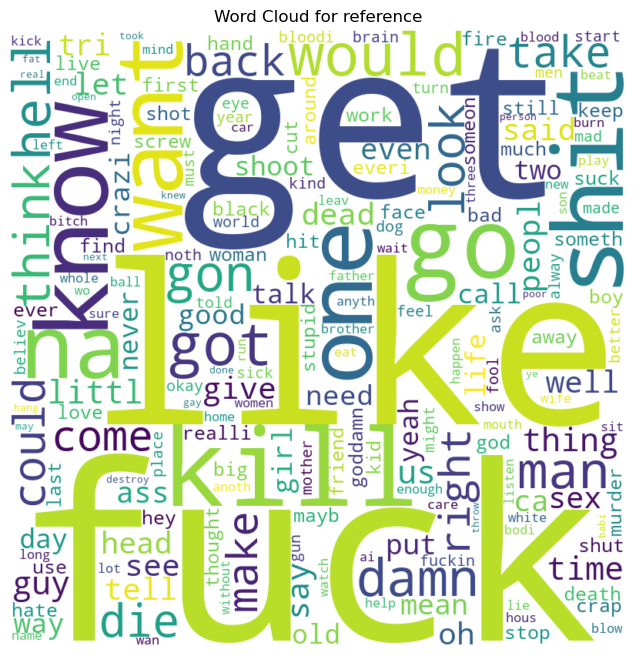

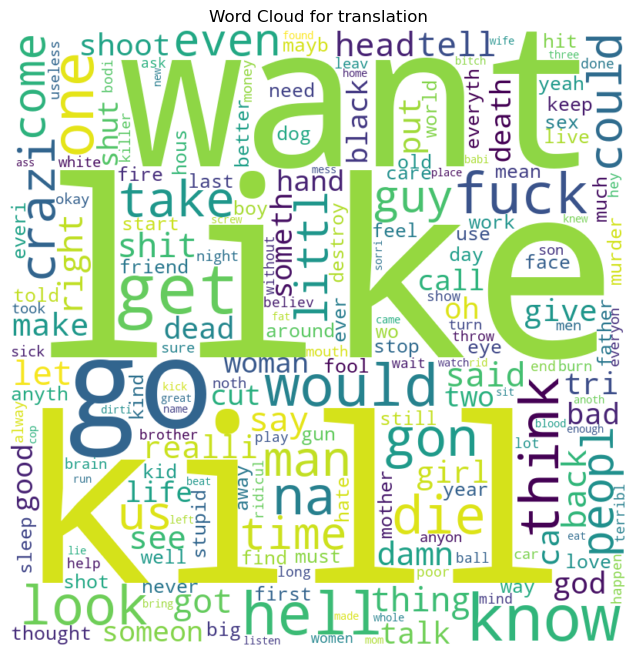

Rare words in Reference: ['datea', 'sloven', 'slopey', 'jailfor', 'rogan', 'washav', 'outw', 'behindtil', 'camellia', 'japonica', 'strelnikov', 'hewel', 'fidgeti', 'figgin', 'pritikin', 'rockeri', 'guysix', 'freeborn', 'grosso', 'woosi', 'fatstep', 'nisa', 'liberec', 'fuglyjust', 'timet', 'novella', 'quinquin', 'dedicatedhi', 'lngen', 'chiinv', 'degreesfreedom', 'earsar', 'entifi', 'pericardiocentesi', 'schmebbl', 'mashallah', 'hellow', 'benten', 'walgi', 'partyin', 'bookish', 'oblowski', 'rish', 'samo', 'nippj', 'noonsens', 'ooutright', '那时他正深陷于弗洛伊德所谓的', '心理性发展之生殖器崇拜阶段', 'roundli', 'rainspout', 'haint', 'microsc', 'stilton', 'phylon', 'vagalentin', 'yasgur', 'kaczynski', 'underpow', 'underpass', 'wackoloon', 'ranken', 'mirrorlik', 'amstw', 'unfought', 'albion', 'dzhokhar', 'krystl', 'overand', 'heatstrok', 'thatworship', 'dropth', 'glyptal', 'bodiless', 'backach', 'glod', 'jumpdoor', 'masaryk', 'breathir', 'thurber', 'cornetto', 'akman', 'disappointingli', 'rheya', 'shitwad', 'roadhog

In [31]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords


# If you haven't downloaded the stopwords from nltk, do so
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Tokenize, convert to lowercase, and remove stopwords
    return [word for word in nltk.word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]

def generate_wordcloud(column_name):
    # Flatten the list of words and create a Counter
    words = [word for sublist in df[column_name].apply(preprocess) for word in sublist]
    word_freq = Counter(words)
    
    # Generate word cloud
    wordcloud = WordCloud(background_color="white", width=800, height=800).generate_from_frequencies(word_freq)
    
    # Plot
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {column_name}")
    plt.show()
    
    return word_freq

# Generate word clouds and get word frequencies
ref_word_freq = generate_wordcloud("reference")
trans_word_freq = generate_wordcloud("translation")

# Finding rare words (e.g., words that appear only once)
rare_words_ref = [word for word, freq in ref_word_freq.items() if freq == 1]
rare_words_trans = [word for word, freq in trans_word_freq.items() if freq == 1]

print("Rare words in Reference:", rare_words_ref)
print("Rare words in Translation:", rare_words_trans)


### Insights:

1- Dominant Words:

- In both the "reference" and "translation" word clouds, words such as "man," "think," "would," "know," "look," "talk," "say," and "time" prominently stand out, indicating their frequent occurrence.
- The word "fuck" is notably prominent in both word clouds, suggesting it's a frequently used term in both datasets.

2- Common Themes:

- Words associated with interactions like "talk," "say," "tell," and "ask" are evident, indicating dialogues or conversations are a significant part of the text.
Words related to thinking and perception such as "think," "know," "look," and "feel" suggest introspection or narrative content.
- The presence of words like "man," "woman," "girl," "boy," and "friend" suggests a focus on relationships or interactions among individuals.

3- Differences:

- The "reference" word cloud seems to have slightly more aggressive or potentially negative terms such as "kill," "shoot," "dead," "hit," and "bitch" compared to the "translation" word cloud.
- The "translation" word cloud has words like "sleep," "burn," and "eat" which are not as prominent in the "reference" cloud, pointing towards possible nuances or differences in context between the two datasets.

4- Word Variations:

- The occurrence of words like "gon" (likely short for "going to") suggests the presence of colloquial language or slang in the datasets.
- Variations of the same base word appear in different forms. For instance, "think" and "thought" both are present, which shows variations in verb tenses across the texts.

5- Possible Content Indications:

- The presence of words related to violence ("shoot," "dead," "kill"), emotions ("feel," "love," "hate"), relationships ("friend," "girl," "man"), and dialogues suggests the texts might be from narrative genres like novels, movies, or plays which involve character interactions, emotions, and actions.


In summary, the word clouds offer a valuable snapshot of the most frequent words and potential themes within the "reference" and "translation" columns. Any analysis, especially for machine translation, should consider these prominent words and themes to ensure accuracy and maintain the essence of the content. Additionally, the differences between the two word clouds might hint at areas where the translation may not be capturing certain nuances or themes as strongly as the reference.